In [2]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

In [3]:
path_img = '1.jpeg'

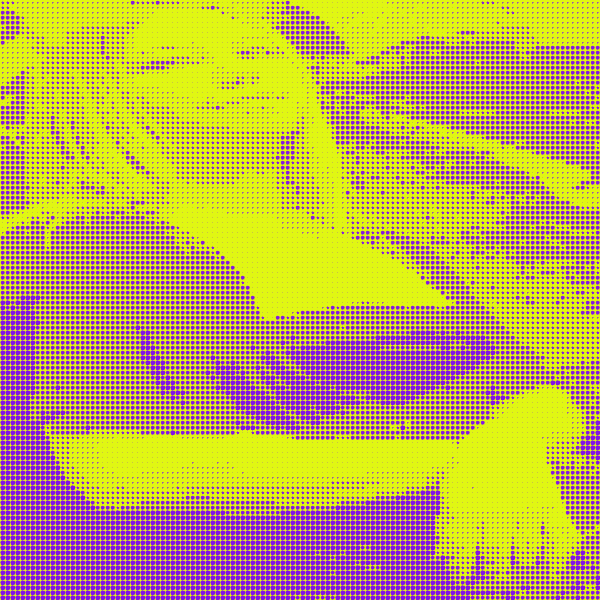

In [4]:
imagem_original = cv.imread(path_img)
imagem_original = cv.resize(imagem_original,(600,600))
imagem_cinza = cv.cvtColor(imagem_original,cv.COLOR_BGR2GRAY)
cores_pontos = (230,20,130)
background_colour = [19,247,224]
max_dots = 120

h,w = imagem_cinza.shape
multiplier = 8

if h == max(h,w):
  downsized_image = cv.resize(imagem_cinza,(int(h*(max_dots/w)),max_dots))
else:
  downsized_image = cv.resize(imagem_cinza,(max_dots,int(h*(max_dots/w))))

hd, wd = downsized_image.shape
blank_img_height = hd * multiplier
blank_img_width = wd * multiplier
padding = int(multiplier/2)
blank_image = np.full(((blank_img_height),(blank_img_width),3), background_colour,dtype=np.uint8)

for y in range(0,hd):
  for x in range(0,wd):
      cv.circle(blank_image,(((x*multiplier)+padding),((y*multiplier)+padding)), int((0.6 * multiplier) * ((255-downsized_image[y][x])/255)), cores_pontos, -1)
blank_image = cv.resize(blank_image,(h,w))

cv2_imshow(blank_image)
cv.waitKey()
cv.destroyAllWindows()